## Steps that needs to be performed:

You need to perform the following eight major tasks to complete the assignment:

1.  Data loading

2. Exploratory data analysis (EDA)

3. Text preprocessing

4. Feature extraction

5. Topic modelling 

6. Model building using supervised learning

7. Model training and evaluation

8. Model inference

# 1. Data Loading

### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import json, re, nltk, spacy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pickle

from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline

## Loading the data

The data is in JSON format and we need to convert it to a dataframe.

In [2]:
with open(r'Dataset\complaints-2021-05-14_08_16.json') as f:
    data = json.load(f)
df = pd.json_normalize(data)

In [3]:
df.head()

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,...,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


### 2. Exploratory data analysis (EDA) and remove blank and null values

In [4]:
# Inspect the dataframe to understand the given data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   _index                             78313 non-null  object 
 1   _type                              78313 non-null  object 
 2   _id                                78313 non-null  object 
 3   _score                             78313 non-null  float64
 4   _source.tags                       10900 non-null  object 
 5   _source.zip_code                   71556 non-null  object 
 6   _source.complaint_id               78313 non-null  object 
 7   _source.issue                      78313 non-null  object 
 8   _source.date_received              78313 non-null  object 
 9   _source.state                      76322 non-null  object 
 10  _source.consumer_disputed          78313 non-null  object 
 11  _source.product                    78313 non-null  obj

In [5]:
# Print top 5 rows of the data
df.head()

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,...,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [6]:
df.index

RangeIndex(start=0, stop=78313, step=1)

In [7]:
#print the column names
print(df.columns)

Index(['_index', '_type', '_id', '_score', '_source.tags', '_source.zip_code',
       '_source.complaint_id', '_source.issue', '_source.date_received',
       '_source.state', '_source.consumer_disputed', '_source.product',
       '_source.company_response', '_source.company', '_source.submitted_via',
       '_source.date_sent_to_company', '_source.company_public_response',
       '_source.sub_product', '_source.timely',
       '_source.complaint_what_happened', '_source.sub_issue',
       '_source.consumer_consent_provided'],
      dtype='object')


# Changing column names

In [8]:
def return_column_name(col_name: str) -> str:
    return col_name.split('.')[-1]

In [9]:
df.columns = list(map(return_column_name, df.columns))

In [10]:
df.columns

Index(['_index', '_type', '_id', '_score', 'tags', 'zip_code', 'complaint_id',
       'issue', 'date_received', 'state', 'consumer_disputed', 'product',
       'company_response', 'company', 'submitted_via', 'date_sent_to_company',
       'company_public_response', 'sub_product', 'timely',
       'complaint_what_happened', 'sub_issue', 'consumer_consent_provided'],
      dtype='object')

# Filling blank values and removing NaN values

In [11]:
df[df.loc[:, 'complaint_what_happened'] == '']

,_index,_type,_id,_score,tags,zip_code,complaint_id,issue,date_received,state,...,company_response,company,submitted_via,date_sent_to_company,company_public_response,sub_product,timely,complaint_what_happened,sub_issue,consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A
5,complaint-public-v2,complaint,3275312,0.0,Older American,48227,3275312,Managing an account,2019-06-13T12:00:00-05:00,MI,...,Closed with monetary relief,JPMORGAN CHASE & CO.,Referral,2019-06-14T12:00:00-05:00,None,Checking account,Yes,,Problem using a debit or ATM card,N/A
6,complaint-public-v2,complaint,3238804,0.0,None,76262,3238804,Managing an account,2019-05-10T12:00:00-05:00,TX,...,Closed with monetary relief,JPMORGAN CHASE & CO.,Phone,2019-05-10T12:00:00-05:00,None,Checking account,Yes,,Problem using a debit or ATM card,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78304,complaint-public-v2,complaint,3080086,0.0,None,76107,3080086,Applying for a mortgage or refinancing an exis...,2018-11-22T12:00:00-05:00,TX,...,Closed with monetary relief,JPMORGAN CHASE & CO.,Web,2018-11-22T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Other
78305,complaint-public-v2,complaint,3103013,0.0,Older American,863XX,3103013,Closing an account,2018-12-17T12:00:00-05:00,AZ,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2018-12-18T12:00:00-05:00,None,Other banking product or service,Yes,,Funds not received from closed account,Consent not provided
78306,complaint-public-v2,complaint,3099437,0.0,None,11217,3099437,Managing an account,2018-12-12T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2018-12-18T12:00:00-05:00,None,Checking account,Yes,,Deposits and withdrawals,N/A
78307,complaint-public-v2,complaint,3156336,0.0,None,074XX,3156336,Applying for a mortgage or refinancing an exis...,2019-02-19T12:00:00-05:00,NJ,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-02-19T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Other


In [12]:
#Assign nan in place of blanks in the complaints column
df[df.loc[:, 'complaint_what_happened'] == ''] = np.nan

In [13]:
# Check if blank values still exist
df[df.loc[:, 'complaint_what_happened'] == '']

,_index,_type,_id,_score,tags,zip_code,complaint_id,issue,date_received,state,...,company_response,company,submitted_via,date_sent_to_company,company_public_response,sub_product,timely,complaint_what_happened,sub_issue,consumer_consent_provided


In [14]:
df.shape

(78313, 22)

In [15]:
#Remove all rows where complaints column is nan
df = df[~df['complaint_what_happened'].isnull()]

In [16]:
df.shape

(21072, 22)

In [17]:
# resetting index value
df = df.reset_index(drop= True)

In [18]:
df.index

RangeIndex(start=0, stop=21072, step=1)

## Text preprocessing

Once you have removed all the blank complaints, you need to:

* Make the text lowercase
* Remove text in square brackets
* Remove punctuation
* Remove words containing numbers


Once you have done these cleaning operations you need to perform the following:
* Lemmatize the texts
* Use POS tags to get relevant words from the texts.


In [19]:
# Convert complaint_what_happened column to string for performing text operations
df['complaint_what_happened'] = df['complaint_what_happened'].astype(str)

# Removing unwanted text

In [20]:
def clean_text(text):
    text = text.lower()
    # Remove text in square brackets
    text = re.sub(r'\[.*?\]', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove words containing numbers
    text = re.sub(r'\b\w*\d\w*\b', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [21]:
df_clean = pd.DataFrame(df['complaint_what_happened'].apply(clean_text))
df_clean

,complaint_what_happened
0,good morning my name is xxxx xxxx and i apprec...
1,i upgraded my xxxx xxxx card in and was told b...
2,chase card was reported on however fraudulent ...
3,on while trying to book a xxxx xxxx ticket i c...
4,my grand son give me check for i deposit it in...
...,...
21067,after being a chase card customer for well ove...
21068,on wednesday xxxxxxxx i called chas my xxxx xx...
21069,i am not familiar with xxxx pay and did not un...
21070,i have had flawless credit for yrs ive had cha...


# Lemmatizing the text

In [22]:
nlp = spacy.load('en_core_web_sm')

In [23]:
def lemmatize_text(text):
    doc = nlp(text)
    lemmatized_text = ' '.join([token.lemma_ for token in doc])
    return lemmatized_text

In [24]:
df_clean['complaint_lemmatized'] = df_clean['complaint_what_happened'].apply(lemmatize_text)
df_clean

,complaint_what_happened,complaint_lemmatized
0,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...
1,i upgraded my xxxx xxxx card in and was told b...,I upgrade my xxxx xxxx card in and be tell by ...
2,chase card was reported on however fraudulent ...,chase card be report on however fraudulent app...
3,on while trying to book a xxxx xxxx ticket i c...,on while try to book a xxxx xxxx ticket I come...
4,my grand son give me check for i deposit it in...,my grand son give I check for I deposit it int...
...,...,...
21067,after being a chase card customer for well ove...,after be a chase card customer for well over a...
21068,on wednesday xxxxxxxx i called chas my xxxx xx...,on wednesday xxxxxxxx I call chas my xxxx xxxx...
21069,i am not familiar with xxxx pay and did not un...,I be not familiar with xxxx pay and do not und...
21070,i have had flawless credit for yrs ive had cha...,I have have flawless credit for yrs I ve have ...


# Extracting POS tag

In [25]:
def get_POS_tags(text):
    tags_required = {'NN', 'JJ', 'VB'}
    blob = TextBlob(text)
    relevant_words = ' '.join(
        [word for word, tag in blob.tags if tag in tags_required])
    return relevant_words

In [26]:
df_clean['complaint_POS_removed'] = df_clean['complaint_lemmatized'].apply(get_POS_tags)
df_clean

,complaint_what_happened,complaint_lemmatized,complaint_POS_removed
0,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...,good morning name be help put stop chase bank ...
1,i upgraded my xxxx xxxx card in and was told b...,I upgrade my xxxx xxxx card in and be tell by ...,xxxx xxxx card be agent upgrade anniversary da...
2,chase card was reported on however fraudulent ...,chase card be report on however fraudulent app...,chase card be report fraudulent application be...
3,on while trying to book a xxxx xxxx ticket i c...,on while try to book a xxxx xxxx ticket I come...,try book xxxx xxxx ticket offer be apply ticke...
4,my grand son give me check for i deposit it in...,my grand son give I check for I deposit it int...,grand son chase account fund clear chase bank ...
...,...,...,...
21067,after being a chase card customer for well ove...,after be a chase card customer for well over a...,be chase card customer decade be multiple soli...
21068,on wednesday xxxxxxxx i called chas my xxxx xx...,on wednesday xxxxxxxx I call chas my xxxx xxxx...,wednesday chas xxxx visa credit card provider ...
21069,i am not familiar with xxxx pay and did not un...,I be not familiar with xxxx pay and do not und...,be familiar xxxx pay do understand great risk ...
21070,i have had flawless credit for yrs ive had cha...,I have have flawless credit for yrs I ve have ...,credit yrs credit card chase freedom xxxx prob...


## The personal details of customer has been masked in the dataset with xx,xxx, xxxx. etc., Let's remove the masked text as this will be of no use for our analysis

In [27]:
def remove_repeated_char_words(text):
    # Use regex to remove words consisting of the same character repeated
    cleaned_text = re.sub(r'\b(\w)\1{1,}\b', '', text)
    # Remove extra whitespace
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    return cleaned_text

In [28]:
df_clean['complaint_final'] = df_clean['complaint_POS_removed'].apply(remove_repeated_char_words)
df_clean

,complaint_what_happened,complaint_lemmatized,complaint_POS_removed,complaint_final
0,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...,good morning name be help put stop chase bank ...,good morning name be help put stop chase bank ...
1,i upgraded my xxxx xxxx card in and was told b...,I upgrade my xxxx xxxx card in and be tell by ...,xxxx xxxx card be agent upgrade anniversary da...,card be agent upgrade anniversary date change ...
2,chase card was reported on however fraudulent ...,chase card be report on however fraudulent app...,chase card be report fraudulent application be...,chase card be report fraudulent application be...
3,on while trying to book a xxxx xxxx ticket i c...,on while try to book a xxxx xxxx ticket I come...,try book xxxx xxxx ticket offer be apply ticke...,try book ticket offer be apply ticket reward c...
4,my grand son give me check for i deposit it in...,my grand son give I check for I deposit it int...,grand son chase account fund clear chase bank ...,grand son chase account fund clear chase bank ...
...,...,...,...,...
21067,after being a chase card customer for well ove...,after be a chase card customer for well over a...,be chase card customer decade be multiple soli...,be chase card customer decade be multiple soli...
21068,on wednesday xxxxxxxx i called chas my xxxx xx...,on wednesday xxxxxxxx I call chas my xxxx xxxx...,wednesday chas xxxx visa credit card provider ...,wednesday chas visa credit card provider ask m...
21069,i am not familiar with xxxx pay and did not un...,I be not familiar with xxxx pay and do not und...,be familiar xxxx pay do understand great risk ...,be familiar pay do understand great risk provi...
21070,i have had flawless credit for yrs ive had cha...,I have have flawless credit for yrs I ve have ...,credit yrs credit card chase freedom xxxx prob...,credit yrs credit card chase freedom problem m...


# Removing rows where length of the sentence is less than 10

In [29]:
less_char_rows = list(df_clean[df_clean['complaint_final'].apply(lambda x: len(x) < 10)].index)
less_char_rows

[58, 1105, 2813, 3194, 3771, 4213, 4899, 4988, 7741, 8369, 17326]

In [30]:
df_clean = df_clean.drop(less_char_rows, axis=0)
df_clean = df_clean.reset_index(drop= True)
df_clean

,complaint_what_happened,complaint_lemmatized,complaint_POS_removed,complaint_final
0,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...,good morning name be help put stop chase bank ...,good morning name be help put stop chase bank ...
1,i upgraded my xxxx xxxx card in and was told b...,I upgrade my xxxx xxxx card in and be tell by ...,xxxx xxxx card be agent upgrade anniversary da...,card be agent upgrade anniversary date change ...
2,chase card was reported on however fraudulent ...,chase card be report on however fraudulent app...,chase card be report fraudulent application be...,chase card be report fraudulent application be...
3,on while trying to book a xxxx xxxx ticket i c...,on while try to book a xxxx xxxx ticket I come...,try book xxxx xxxx ticket offer be apply ticke...,try book ticket offer be apply ticket reward c...
4,my grand son give me check for i deposit it in...,my grand son give I check for I deposit it int...,grand son chase account fund clear chase bank ...,grand son chase account fund clear chase bank ...
...,...,...,...,...
21056,after being a chase card customer for well ove...,after be a chase card customer for well over a...,be chase card customer decade be multiple soli...,be chase card customer decade be multiple soli...
21057,on wednesday xxxxxxxx i called chas my xxxx xx...,on wednesday xxxxxxxx I call chas my xxxx xxxx...,wednesday chas xxxx visa credit card provider ...,wednesday chas visa credit card provider ask m...
21058,i am not familiar with xxxx pay and did not un...,I be not familiar with xxxx pay and do not und...,be familiar xxxx pay do understand great risk ...,be familiar pay do understand great risk provi...
21059,i have had flawless credit for yrs ive had cha...,I have have flawless credit for yrs I ve have ...,credit yrs credit card chase freedom xxxx prob...,credit yrs credit card chase freedom problem m...


#### Find the top 40 words by frequency among all the articles after processing the text.

In [31]:
def generate_wordcloud(df, column_name='complaint_final', max_words=40, max_font_size=60):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(
        max_font_size=max_font_size,
        max_words=max_words,
        background_color="white",
        random_state=100,
        stopwords=stopwords
    ).generate(" ".join(df[column_name]))
    plt.figure(figsize=(12, 12))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

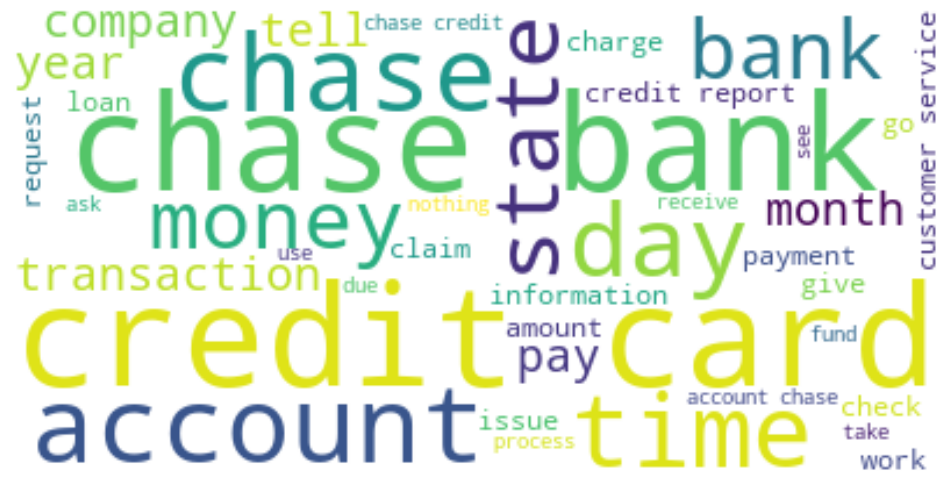

In [32]:
generate_wordcloud(df_clean)

#### Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text.

In [33]:
from nltk import ngrams
from nltk.corpus import stopwords
from collections import Counter
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [34]:
def get_top_ngrams(text, n=None, ngram_range=(1, 1)):
    vec = CountVectorizer(stop_words='english', ngram_range=ngram_range)    
    bag_of_words = vec.fit_transform(text)
    word_counts = bag_of_words.sum(axis=0)
    words_frequency = [(word, word_counts[0, index]) for word, index in vec.vocabulary_.items()]
    sorted_frequency = sorted(words_frequency, key=lambda x: x[1], reverse=True)
    return sorted_frequency[:n] if n else sorted_frequency

In [35]:
top_30words = get_top_ngrams(df_clean['complaint_final'].values.astype('U'), n=30, ngram_range=(1,1))
df_unigram = pd.DataFrame(top_30words, columns=['unigram', 'count'])
df_unigram

,unigram,count
0,chase,76832
1,account,47822
2,credit,34145
3,card,30144
4,bank,28404
5,payment,21165
6,charge,16462
7,time,16005
8,check,14262
9,day,12971


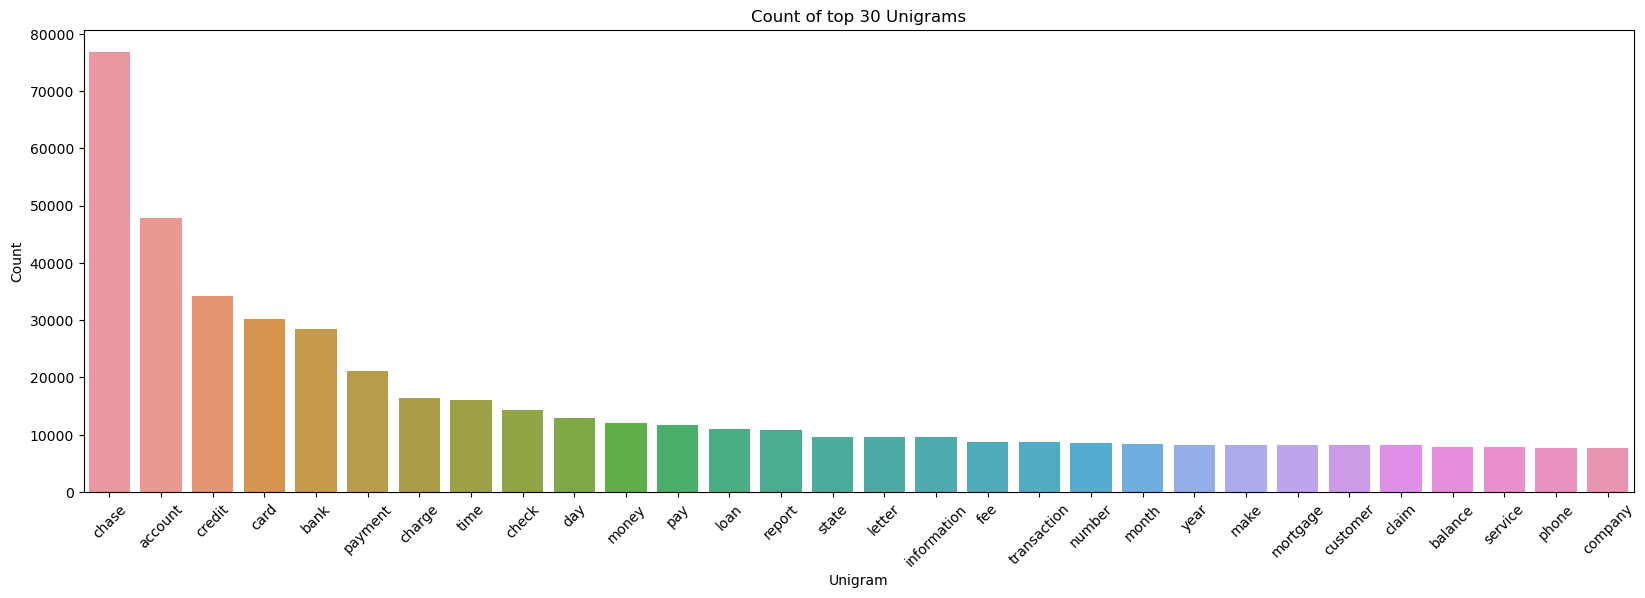

In [36]:
# Plotting top 30 Unigrams
plt.figure(figsize=[20,6])
sns.barplot(x=df_unigram['unigram'], y=df_unigram['count'])
plt.xticks(rotation=45)
plt.xlabel("Unigram")
plt.ylabel("Count")
plt.title("Count of top 30 Unigrams")
plt.show()

In [37]:
#Print the top 10 words in the unigram frequency
df_unigram.head(10)

,unigram,count
0,chase,76832
1,account,47822
2,credit,34145
3,card,30144
4,bank,28404
5,payment,21165
6,charge,16462
7,time,16005
8,check,14262
9,day,12971


In [38]:
#Write your code here to find the top 30 bigram frequency among the complaints in the cleaned datafram(df_clean).
top_30words = get_top_ngrams(df_clean['complaint_final'].values.astype('U'),
                             n=30,
                             ngram_range=(2, 2))
df_bigram = pd.DataFrame(top_30words, columns=['bigram', 'count'])
df_bigram

,bigram,count
0,credit card,12775
1,chase bank,11842
2,credit report,3951
3,account chase,3490
4,customer service,3071
5,chase credit,2964
6,check account,2424
7,bank account,2188
8,chase account,2183
9,jp morgan,2159


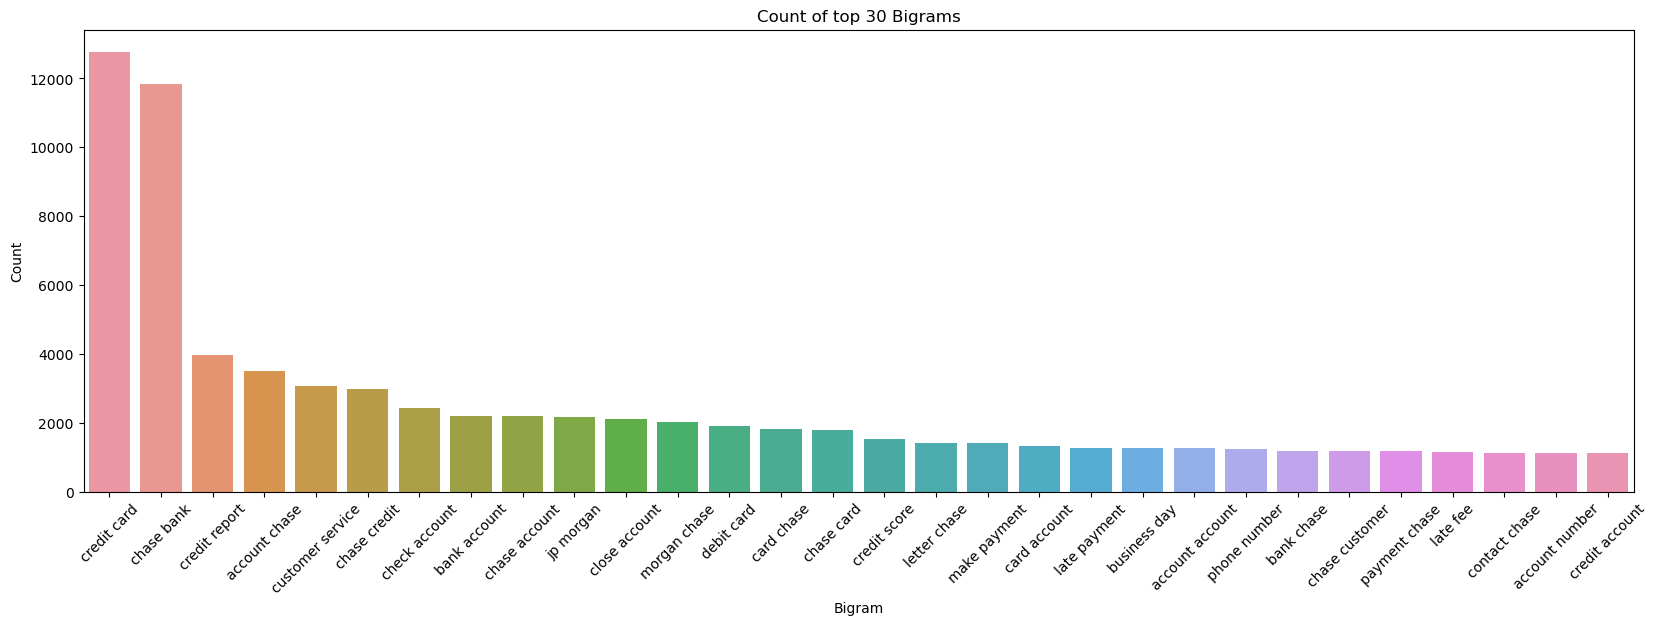

In [39]:
# Plotting top 30 Bigrams
plt.figure(figsize=[20,6])
sns.barplot(x=df_bigram['bigram'], y=df_bigram['count'])
plt.xticks(rotation=45)
plt.xlabel("Bigram")
plt.ylabel("Count")
plt.title("Count of top 30 Bigrams")
plt.show()

In [40]:
#Print the top 10 words in the bigram frequency
df_bigram.head(10)

,bigram,count
0,credit card,12775
1,chase bank,11842
2,credit report,3951
3,account chase,3490
4,customer service,3071
5,chase credit,2964
6,check account,2424
7,bank account,2188
8,chase account,2183
9,jp morgan,2159


In [41]:
#Write your code here to find the top 30 trigram frequency among the complaints in the cleaned datafram(df_clean). 
top_30words = get_top_ngrams(df_clean['complaint_final'].values.astype('U'), n=30, ngram_range=(3,3))
df_trigram = pd.DataFrame(top_30words, columns=['trigram', 'count'])
df_trigram

,trigram,count
0,chase credit card,2332
1,jp morgan chase,1780
2,credit card company,984
3,credit card account,942
4,credit card chase,938
5,account chase bank,799
6,chase customer service,614
7,chase bank account,509
8,inquiry credit report,470
9,charge credit card,392


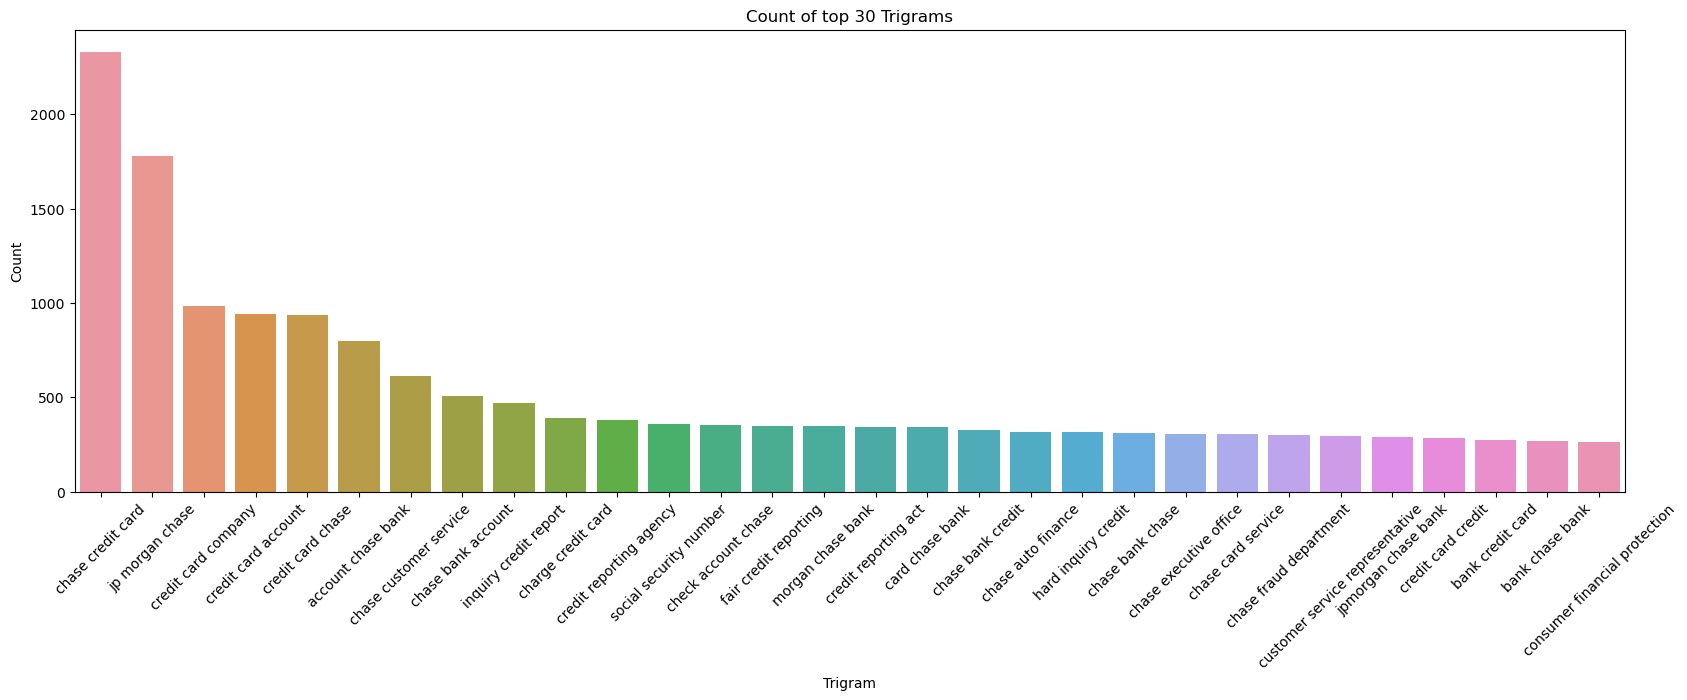

In [42]:
plt.figure(figsize=[20, 6])
sns.barplot(x=df_trigram['trigram'], y=df_trigram['count'])
plt.xticks(rotation=45)
plt.xlabel("Trigram")
plt.ylabel("Count")
plt.title("Count of top 30 Trigrams")
plt.show()

In [43]:
#Print the top 10 words in the trigram frequency
df_trigram.head(10)

,trigram,count
0,chase credit card,2332
1,jp morgan chase,1780
2,credit card company,984
3,credit card account,942
4,credit card chase,938
5,account chase bank,799
6,chase customer service,614
7,chase bank account,509
8,inquiry credit report,470
9,charge credit card,392


## Feature Extraction
Transform the raw text into a matrix of TF-IDF features.

**max_df** helps eliminate terms that occur too often, often referred to as "corpus-specific stop words." Setting max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints."

**min_df** is used to filter out terms that are too rare. Setting min_df = 2 means "ignore terms that appear in fewer than 2 complaints."

In [44]:
tfidf = TfidfVectorizer(min_df=2, max_df=0.95, stop_words='english')
tfidf

TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

#### Create a document term matrix using fit_transform

The contents of a document term matrix are tuples of (complaint_id,token_id) tf-idf score:
The tuples that are not there have a tf-idf score of 0

In [45]:
dtm = tfidf.fit_transform(df_clean['complaint_final'])
dtm

<21061x10293 sparse matrix of type '<class 'numpy.float64'>'
	with 956528 stored elements in Compressed Sparse Row format>

## Topic Modeling with NMF

Non-Negative Matrix Factorization (NMF) is an unsupervised technique, meaning that topics are not pre-labeled for model training. NMF works by decomposing high-dimensional vectors into a lower-dimensional representation, where all coefficients are non-negative.

* Determine the optimal number of clusters
* Use this number to create word clusters
* Review and validate the accuracy of each cluster in relation to the complaints
* Adjust the labels as necessary
* Assign cluster names to the corresponding topics

## Manual Topic Modeling

By doing a trial-and-error approach to determine the optimal number of topics for your NMF model.

The key parameter to specify is the number of components, which represents the desired number of topics. This step is critical in the topic modeling process and will significantly influence the quality of your final topics.

In [46]:
from sklearn.decomposition import NMF

num_topics = 5
nmf_model = NMF(n_components=num_topics, random_state=40)

In [47]:
nmf_model.fit(dtm)

NMF(n_components=5, random_state=40)

In [48]:
nmf_model.get_feature_names_out()

array(['nmf0', 'nmf1', 'nmf2', 'nmf3', 'nmf4'], dtype=object)

In [49]:
H = nmf_model.components_
H

array([[0.00000000e+00, 1.90934937e-03, 0.00000000e+00, ...,
        0.00000000e+00, 3.64541488e-04, 5.30682693e-05],
       [9.79964649e-03, 0.00000000e+00, 0.00000000e+00, ...,
        9.63783371e-04, 0.00000000e+00, 1.16049629e-04],
       [0.00000000e+00, 4.31235845e-03, 1.10268323e-03, ...,
        1.52177771e-03, 3.58595693e-03, 0.00000000e+00],
       [6.54040314e-03, 0.00000000e+00, 0.00000000e+00, ...,
        2.40630082e-04, 2.11328968e-03, 6.28308242e-04],
       [4.70080455e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.21506383e-03, 0.00000000e+00]])

# Print the Top15 words for each of the topics

In [50]:
words = np.array(tfidf.get_feature_names_out())
words

array(['aarp', 'abandon', 'abandonment', ..., 'zombie', 'zone', 'zoom'],
      dtype=object)

In [51]:
# Get the top 15 words for each topic using advanced indexing
top_n = 15
top_words_indices = np.argsort(H, axis=1)[:, ::-1][:, :top_n]

In [52]:
topic_words = pd.DataFrame(
    data=words[top_words_indices],
    index=[f'Topic {i + 1}' for i in range(num_topics)],
    columns=[f'Word {i + 1}' for i in range(top_n)]
)
topic_words

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15
Topic 1,account,check,bank,chase,money,fund,deposit,close,branch,day,open,transfer,business,number,transaction
Topic 2,credit,card,report,inquiry,chase,account,hard,remove,score,company,debt,open,limit,apply,information
Topic 3,loan,mortgage,chase,home,modification,property,year,letter,rate,document,foreclosure,time,bank,house,sale
Topic 4,charge,card,chase,dispute,transaction,fee,merchant,purchase,claim,fraud,refund,fraudulent,service,email,time
Topic 5,payment,late,balance,pay,fee,month,make,statement,monthly,day,time,chase,auto,credit,account


**Observation**

Based on the identified topics, we can assign labels according to the associated products and services:

- Topic 1: Bank Account Services
- Topic 2: Credit Cards / Prepaid Cards
- Topic 3: Mortgages / Loans
- Topic 4: Theft / Dispute Reporting
- Topic 5: Other Issues

# Create the best topic for each complaint in terms of integer value 0,1,2,3 & 4

In [53]:
topic_results = nmf_model.transform(dtm)
topic_results

array([[0.02321477, 0.01287117, 0.03056233, 0.01156556, 0.00552944],
       [0.00540793, 0.00901639, 0.00468864, 0.00956734, 0.00215258],
       [0.        , 0.05720014, 0.00180612, 0.00836555, 0.        ],
       ...,
       [0.01603826, 0.0132818 , 0.01159414, 0.02491969, 0.        ],
       [0.00080186, 0.0338419 , 0.00365589, 0.02566391, 0.08521655],
       [0.03071587, 0.02767892, 0.00231883, 0.        , 0.091299  ]])

# Assign the best topic to each of the cmplaints in Topic Column

In [54]:
df_clean['Topic'] = topic_results.argmax(axis=1)

In [55]:
df_clean.head()

,complaint_what_happened,complaint_lemmatized,complaint_POS_removed,complaint_final,Topic
0,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...,good morning name be help put stop chase bank ...,good morning name be help put stop chase bank ...,2
1,i upgraded my xxxx xxxx card in and was told b...,I upgrade my xxxx xxxx card in and be tell by ...,xxxx xxxx card be agent upgrade anniversary da...,card be agent upgrade anniversary date change ...,3
2,chase card was reported on however fraudulent ...,chase card be report on however fraudulent app...,chase card be report fraudulent application be...,chase card be report fraudulent application be...,1
3,on while trying to book a xxxx xxxx ticket i c...,on while try to book a xxxx xxxx ticket I come...,try book xxxx xxxx ticket offer be apply ticke...,try book ticket offer be apply ticket reward c...,1
4,my grand son give me check for i deposit it in...,my grand son give I check for I deposit it int...,grand son chase account fund clear chase bank ...,grand son chase account fund clear chase bank ...,0


### Print the first 5 Complaint for each of the Topics

In [56]:
df_clean_5=df_clean.groupby('Topic').head(5)
df_clean_5.sort_values('Topic')

,complaint_what_happened,complaint_lemmatized,complaint_POS_removed,complaint_final,Topic
12,i opened an account with chase bank on xxxx an...,I open an account with chase bank on xxxx and ...,account chase bank use code xxxx bonus follow ...,account chase bank use code bonus follow term ...,0
4,my grand son give me check for i deposit it in...,my grand son give I check for I deposit it int...,grand son chase account fund clear chase bank ...,grand son chase account fund clear chase bank ...,0
6,with out notice jp morgan chase restricted my ...,with out notice jp morgan chase restrict my ac...,notice jp morgan chase restrict account debit ...,notice jp morgan chase restrict account debit ...,0
10,mishandling of this account by chase auto and ...,mishandle of this account by chase auto and xxxx,mishandle account chase auto xxxx,mishandle account chase auto,0
15,i opened the saving account for the bonus i wa...,I open the save account for the bonus I be sup...,save account bonus be suppose received bonus c...,save account bonus be suppose received bonus c...,0
2,chase card was reported on however fraudulent ...,chase card be report on however fraudulent app...,chase card be report fraudulent application be...,chase card be report fraudulent application be...,1
3,on while trying to book a xxxx xxxx ticket i c...,on while try to book a xxxx xxxx ticket I come...,try book xxxx xxxx ticket offer be apply ticke...,try book ticket offer be apply ticket reward c...,1
5,can you please remove inquiry,can you please remove inquiry,please remove inquiry,please remove inquiry,1
9,i have a chase credit card which is incorrectl...,I have a chase credit card which be incorrectl...,chase credit card be report datum credit repor...,chase credit card be report datum credit repor...,1
11,i have reached out to xxxx several times in at...,I have reach out to xxxx several time in attem...,xxxx several time attempt have fraudulent inqu...,several time attempt have fraudulent inquiry r...,1


### Create the dictionary of Topic names and Topics

In [57]:
topic_names = {
    0: "Bank account services",
    1: "Credit Card/Prepaid Card",
    2: "Mortgages/Loans",
    3: "Theft/Dispute reporting",
    4: "Others"
}
#Replace Topics with Topic Names
df_clean['topic_names'] = df_clean['Topic'].map(topic_names)

In [58]:
df_clean.head()

,complaint_what_happened,complaint_lemmatized,complaint_POS_removed,complaint_final,Topic,topic_names
0,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...,good morning name be help put stop chase bank ...,good morning name be help put stop chase bank ...,2,Mortgages/Loans
1,i upgraded my xxxx xxxx card in and was told b...,I upgrade my xxxx xxxx card in and be tell by ...,xxxx xxxx card be agent upgrade anniversary da...,card be agent upgrade anniversary date change ...,3,Theft/Dispute reporting
2,chase card was reported on however fraudulent ...,chase card be report on however fraudulent app...,chase card be report fraudulent application be...,chase card be report fraudulent application be...,1,Credit Card/Prepaid Card
3,on while trying to book a xxxx xxxx ticket i c...,on while try to book a xxxx xxxx ticket I come...,try book xxxx xxxx ticket offer be apply ticke...,try book ticket offer be apply ticket reward c...,1,Credit Card/Prepaid Card
4,my grand son give me check for i deposit it in...,my grand son give I check for I deposit it int...,grand son chase account fund clear chase bank ...,grand son chase account fund clear chase bank ...,0,Bank account services


In [59]:
df_clean['Topic'].value_counts()

3    5386
0    5072
1    4413
2    3892
4    2298
Name: Topic, dtype: int64

In [60]:
df_clean['topic_names'].value_counts()

Theft/Dispute reporting     5386
Bank account services       5072
Credit Card/Prepaid Card    4413
Mortgages/Loans             3892
Others                      2298
Name: topic_names, dtype: int64

In [61]:
df_clean.shape

(21061, 6)

## Supervised model to predict complaints to the relevant Topics.

Building the model to create the topics for each complaints.

In [62]:
df_clean.head()

,complaint_what_happened,complaint_lemmatized,complaint_POS_removed,complaint_final,Topic,topic_names
0,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...,good morning name be help put stop chase bank ...,good morning name be help put stop chase bank ...,2,Mortgages/Loans
1,i upgraded my xxxx xxxx card in and was told b...,I upgrade my xxxx xxxx card in and be tell by ...,xxxx xxxx card be agent upgrade anniversary da...,card be agent upgrade anniversary date change ...,3,Theft/Dispute reporting
2,chase card was reported on however fraudulent ...,chase card be report on however fraudulent app...,chase card be report fraudulent application be...,chase card be report fraudulent application be...,1,Credit Card/Prepaid Card
3,on while trying to book a xxxx xxxx ticket i c...,on while try to book a xxxx xxxx ticket I come...,try book xxxx xxxx ticket offer be apply ticke...,try book ticket offer be apply ticket reward c...,1,Credit Card/Prepaid Card
4,my grand son give me check for i deposit it in...,my grand son give I check for I deposit it int...,grand son chase account fund clear chase bank ...,grand son chase account fund clear chase bank ...,0,Bank account services


# Training Data

In [63]:
#Keep the columns"complaint_what_happened" & "Topic" only in the new dataframe --> training_data
training_data = df_clean[['complaint_final', 'Topic']]
training_data

,complaint_final,Topic
0,good morning name be help put stop chase bank ...,2
1,card be agent upgrade anniversary date change ...,3
2,chase card be report fraudulent application be...,1
3,try book ticket offer be apply ticket reward c...,1
4,grand son chase account fund clear chase bank ...,0
...,...,...
21056,be chase card customer decade be multiple soli...,1
21057,wednesday chas visa credit card provider ask m...,3
21058,be familiar pay do understand great risk provi...,3
21059,credit yrs credit card chase freedom problem m...,4


# Train Test Split

In [64]:
from gensim.models import Word2Vec

In [65]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    training_data['complaint_final'],
    training_data['Topic'],
    test_size=0.2,
    random_state=42)

# Count Vectorization

In [66]:
count_vectorizer = CountVectorizer(max_features=5000)
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

# TF-IDF Vectorization

In [67]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Average Word2Vec Vectorization using

In [68]:
# Tokenize sentences into words
train_sentences = [sentence.split() for sentence in X_train]
word2vec_model = Word2Vec(sentences=train_sentences, vector_size=100, window=5, min_count=1, workers=4)

In [69]:
# function to average Word2Vec vectors
def get_word2vec_vector(sentence):
    words = sentence.split()
    word_vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    return sum(word_vectors) / len(word_vectors) if word_vectors else np.zeros(word2vec_model.vector_size)

In [70]:
# Apply to training and test data
X_train_word2vec = np.array([get_word2vec_vector(sentence) for sentence in X_train])
X_test_word2vec = np.array([get_word2vec_vector(sentence) for sentence in X_test])

# Model Building and Evaluation with default parameters

### Model Evaluation Function

In [71]:
def print_confusion_matrix_and_report(y_true, y_pred):
    metrics = {
        'Confusion Matrix': confusion_matrix(y_true, y_pred),
        'Classification Report': classification_report(y_true, y_pred)
    }
    for key, value in metrics.items():
        if key == 'Confusion Matrix':
            print(f"\n{key}:\n{value}")
        elif key == 'Classification Report':
            print(f"\n{key}:\n{value}")
        else:
            print(f"{key}: {value:.4f}")

# Model fitting

### function to return accuracy, precision, recall and f1_score

In [72]:
def return_metrics(y_true, y_pred):
    return (accuracy_score(y_true, y_pred),
            precision_score(y_true,
                            y_pred,
                            average='weighted',
                            zero_division=0),
            recall_score(y_true, y_pred, average='weighted', zero_division=0),
            f1_score(y_true, y_pred, average='weighted', zero_division=0))

### Function to fit the models and return the model metrics in a dataframe

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [74]:
def evaluate_models(X_dict, y_train, y_test):
    """Evaluate models with different vectorization methods."""
    models = {
        'logistic_regression': LogisticRegression(),
        'decision_tree': DecisionTreeClassifier(),
        'random_forest': RandomForestClassifier()
    }

    results = []

    for vect_type, (X_train, X_test) in X_dict.items():
        for model_name, model in models.items():
            model.fit(X_train, y_train)

            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)

            train_metrics = return_metrics(y_train, y_train_pred)
            test_metrics = return_metrics(y_test, y_test_pred)

            results.append({
                'vect_type': vect_type,
                'Model': model_name,
                'train_accuracy': train_metrics[0],
                'train_precision': train_metrics[1],
                'train_recall': train_metrics[2],
                'train_f1score': train_metrics[3],
                'test_accuracy': test_metrics[0],
                'test_precision': test_metrics[1],
                'test_recall': test_metrics[2],
                'test_f1score': test_metrics[3]
            })

    return pd.DataFrame(results)

In [75]:
X_dict = {
    'count_vect': (X_train_count, X_test_count),
    'tfidf_vec': (X_train_tfidf, X_test_tfidf),
    'word2vec': (X_train_word2vec, X_test_word2vec)
}

model_metric_df = evaluate_models(X_dict, y_train, y_test)

In [76]:
model_metric_df.sort_values(by=['train_accuracy', 'test_accuracy'])

,vect_type,Model,train_accuracy,train_precision,train_recall,train_f1score,test_accuracy,test_precision,test_recall,test_f1score
6,word2vec,logistic_regression,0.940408,0.940392,0.940408,0.940391,0.941372,0.941295,0.941372,0.941312
3,tfidf_vec,logistic_regression,0.991156,0.991173,0.991156,0.991152,0.962260,0.962464,0.962260,0.962164
0,count_vect,logistic_regression,0.999763,0.999763,0.999763,0.999763,0.971517,0.971571,0.971517,0.971499
7,word2vec,decision_tree,1.000000,1.000000,1.000000,1.000000,0.774270,0.775209,0.774270,0.774669
1,count_vect,decision_tree,1.000000,1.000000,1.000000,1.000000,0.792784,0.793846,0.792784,0.792977
4,tfidf_vec,decision_tree,1.000000,1.000000,1.000000,1.000000,0.813435,0.813894,0.813435,0.813607
2,count_vect,random_forest,1.000000,1.000000,1.000000,1.000000,0.867790,0.869749,0.867790,0.864856
8,word2vec,random_forest,1.000000,1.000000,1.000000,1.000000,0.891526,0.891348,0.891526,0.890767
5,tfidf_vec,random_forest,1.000000,1.000000,1.000000,1.000000,0.894375,0.894987,0.894375,0.892413


**Better Model**:
    
    LogisticRegression
**Better Vectoriser**:
    
    Word2Vec

### Performing Logistic Regression Hyperparameter Tuning with Word2Vec vectorised input

In [77]:
logistic_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200],
    'class_weight': [None, 'balanced']
}

In [78]:
logistic_grid = RandomizedSearchCV(LogisticRegression(n_jobs=-1),
                                   logistic_params,
                                   cv=5,
                                   scoring='f1')
logistic_grid.fit(X_train_word2vec, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(n_jobs=-1),
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'class_weight': [None, 'balanced'],
                                        'max_iter': [100, 200],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']},
                   scoring='f1')

In [79]:
print("Best parameters for Logistic Regression:", logistic_grid.best_params_)
print("Best score for Logistic Regression:", logistic_grid.best_score_)

Best parameters for Logistic Regression: {'solver': 'saga', 'penalty': 'l1', 'max_iter': 200, 'class_weight': None, 'C': 0.1}
Best score for Logistic Regression: nan


In [80]:
# Evaluate on test set
logistic_best = logistic_grid.best_estimator_
y_pred_logistic = logistic_best.predict(X_test_word2vec)
print(classification_report(y_test, y_pred_logistic))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1025
           1       0.92      0.95      0.94       845
           2       0.93      0.93      0.93       777
           3       0.92      0.92      0.92      1105
           4       0.91      0.83      0.87       461

    accuracy                           0.92      4213
   macro avg       0.92      0.92      0.92      4213
weighted avg       0.92      0.92      0.92      4213



### Performing Random Forest Hyperparameter Tuning with Word2Vec vectorised input

In [81]:
# Hyperparameter tuning for Random Forest
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

In [82]:
rf_grid = RandomizedSearchCV(RandomForestClassifier(),
                             rf_params,
                             cv=5,
                             scoring='f1',
                            n_jobs=-1)
rf_grid.fit(X_train_word2vec, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   scoring='f1')

In [83]:
print("Best parameters for Random Forest:", rf_grid.best_params_)
print("Best score for Random Forest:", rf_grid.best_score_)

Best parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'class_weight': 'balanced'}
Best score for Random Forest: nan


In [84]:
rf_best = rf_grid.best_estimator_
y_pred_rf = rf_best.predict(X_test_word2vec)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1025
           1       0.88      0.92      0.90       845
           2       0.89      0.91      0.90       777
           3       0.89      0.89      0.89      1105
           4       0.89      0.75      0.81       461

    accuracy                           0.89      4213
   macro avg       0.89      0.88      0.88      4213
weighted avg       0.89      0.89      0.89      4213



In [85]:
get_word2vec_vector('I would like to raise a ticket regarding an issue with my mortgage/loan account and request assistance with [briefly describe the issue, e.g., "my monthly payment," "loan application status," or "interest rate clarification"].')

array([ 1.13844268e-01, -4.26322192e-01,  2.74345223e-02,  1.14055015e-01,
       -3.08428556e-01,  9.81488228e-02,  4.75533754e-01,  3.00480485e-01,
        3.44085135e-02, -3.05940777e-01,  3.06768119e-01,  3.43318731e-01,
       -1.69086829e-02,  4.59753990e-01, -3.87222022e-01,  1.46467656e-01,
       -2.04559892e-01, -1.42432362e-01, -5.13573885e-01, -8.34044456e-01,
        1.95293859e-01,  2.07459867e-01, -1.35524943e-01,  2.94456165e-02,
        2.11721897e-01, -1.23489216e-01, -1.58975452e-01, -4.90404248e-01,
        3.48568469e-01, -8.11875835e-02, -1.64196759e-01, -4.11090255e-02,
       -3.35118860e-01, -4.11318988e-01, -1.43005237e-01,  4.14700061e-01,
        9.90844965e-02,  4.20120597e-01,  3.50674540e-01, -8.19889128e-01,
        4.72351193e-01, -3.90500203e-02, -1.35133758e-01,  6.31682277e-01,
        6.29187346e-01, -2.52031833e-01,  3.46173674e-01, -5.76978587e-02,
        6.23302519e-01,  6.52984798e-01, -6.67217672e-01, -6.34962499e-01,
        6.87574208e-01, -

# Testing on whole sentence

In [86]:
test_text = 'I would like to raise a ticket regarding an issue with my mortgage or loan account and request assistance with [briefly describe the issue, e.g., "my monthly payment," "loan application status," or "interest rate clarification"].'
test_word2vec = get_word2vec_vector(get_POS_tags(lemmatize_text(clean_text(test_text))))
logistic_best.predict([test_word2vec])

array([2], dtype=int64)

In [87]:
test_text = 'I want to know how to create a bank account in JP morgan chase bank'
test_word2vec = get_word2vec_vector(get_POS_tags(lemmatize_text(clean_text(test_text))))
logistic_best.predict([test_word2vec])

array([0], dtype=int64)

In [90]:
import re
import numpy as np
from textblob import TextBlob
import spacy

class TextProcessor:
    def __init__(self, word2vec_model):
        self.word2vec_model = word2vec_model
        self.nlp = spacy.load('en_core_web_sm')  # Load your preferred spaCy model

    def clean_text(self, text):
        text = text.lower()
        text = re.sub(r'\[.*?\]', '', text)  # Remove text in square brackets
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        text = re.sub(r'\b\w*\d\w*\b', '', text)  # Remove words containing numbers
        text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
        return text

    def lemmatize_text(self, text):
        doc = self.nlp(text)
        lemmatized_text = ' '.join([token.lemma_ for token in doc])
        return lemmatized_text

    def get_POS_tags(self, text):
        tags_required = {'NN', 'JJ', 'VB'}
        blob = TextBlob(text)
        relevant_words = ' '.join(
            [word for word, tag in blob.tags if tag in tags_required]
        )
        return relevant_words

    def get_word2vec_vector(self, sentence):
        words = sentence.split()
        word_vectors = [
            self.word2vec_model.wv[word] for word in words if word in self.word2vec_model.wv
        ]
        return sum(word_vectors) / len(word_vectors) if word_vectors else np.zeros(self.word2vec_model.vector_size)

    def process_text(self, text):
        cleaned_text = self.clean_text(text)
        lemmatized_text = self.lemmatize_text(cleaned_text)
        pos_tags_text = self.get_POS_tags(lemmatized_text)
        return self.get_word2vec_vector(pos_tags_text)

In [91]:
# Usage
# Assuming `word2vec_model` is already defined
processor = TextProcessor(word2vec_model)
test_text = 'I want to know how to create a bank account in JP Morgan Chase Bank'
test_word2vec = processor.process_text(test_text)

In [92]:
logistic_best.predict([test_word2vec])

array([0], dtype=int64)

# Saving Word2Vec Model for text preprocessing

In [94]:
with open(r'Models/word2vec_model.pkl', 'wb') as f:
    pickle.dump(word2vec_model, f)

# Saving the Logistic Regression ML model to classify the ticket

In [95]:
with open(r'Models/support_classification_model.pkl', 'wb') as f:
    pickle.dump(logistic_best, f)